/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name w

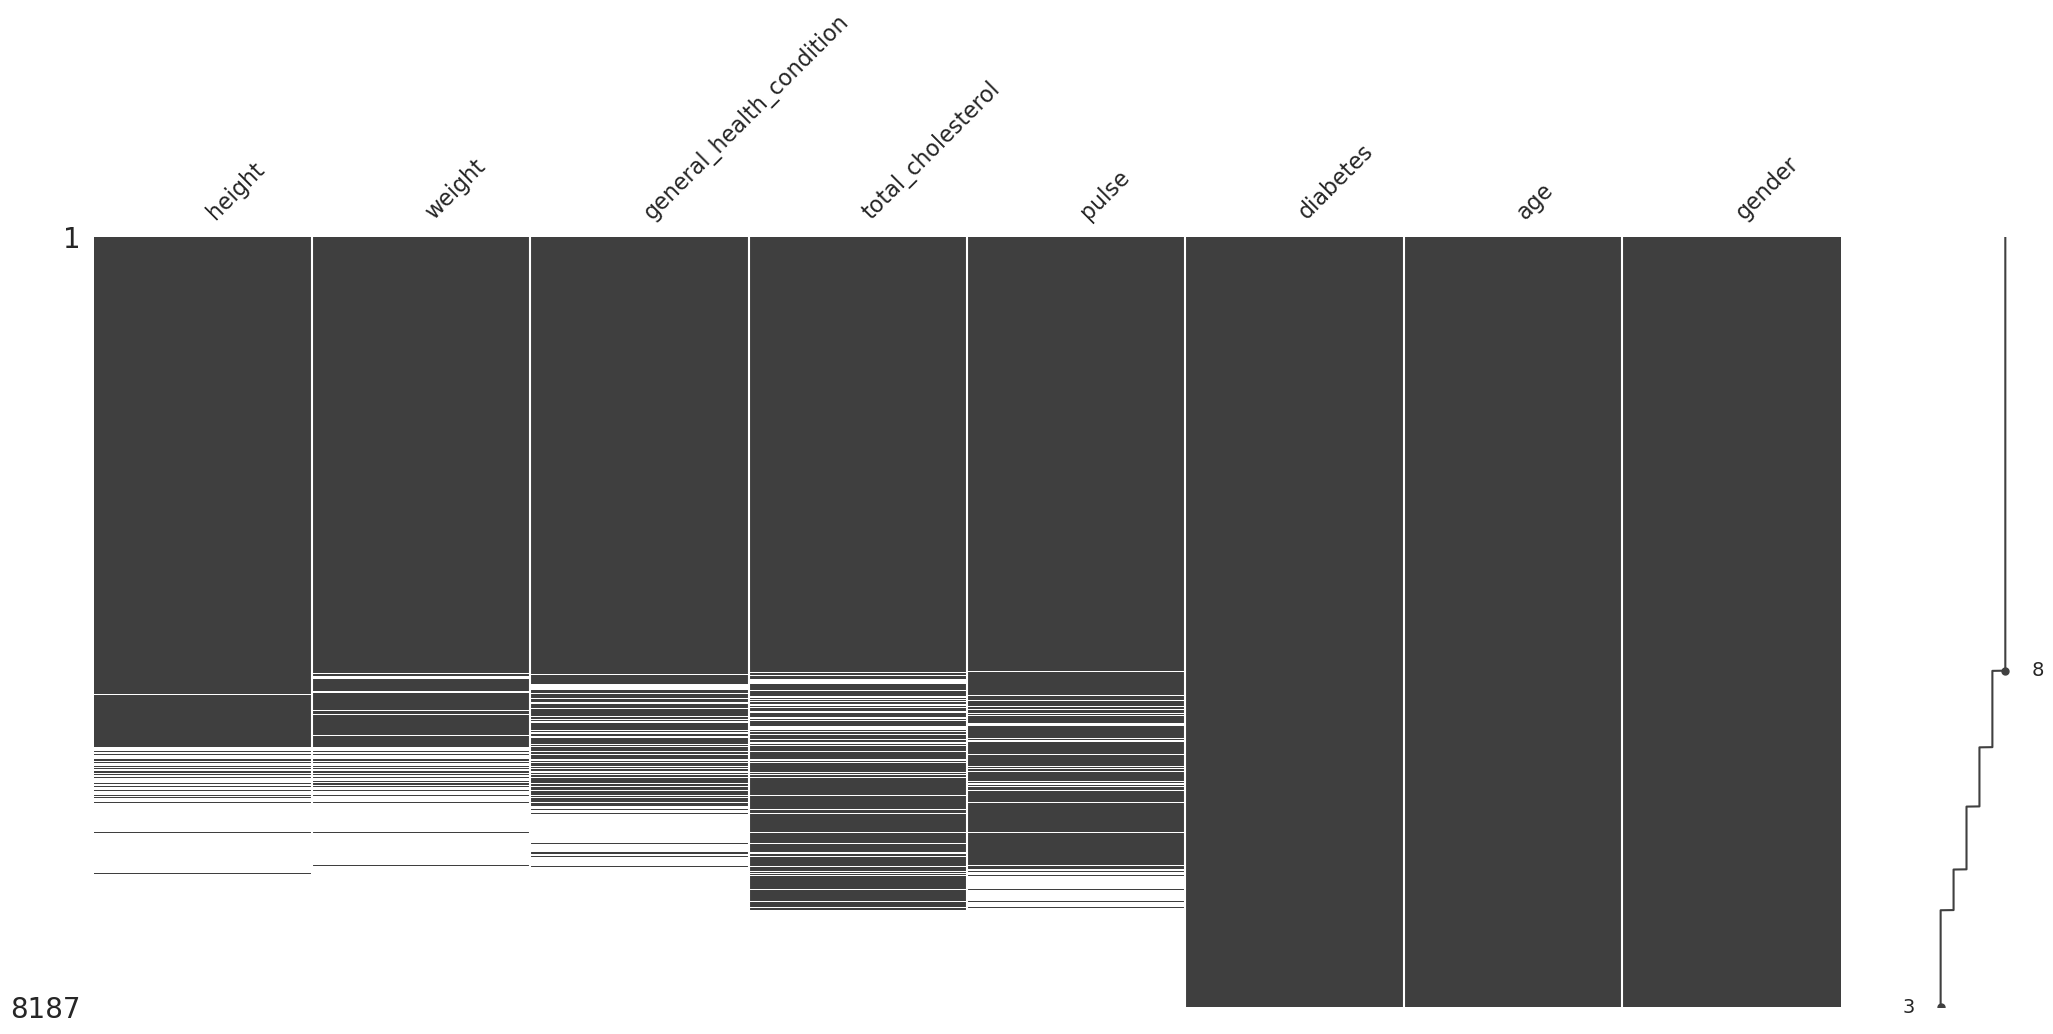

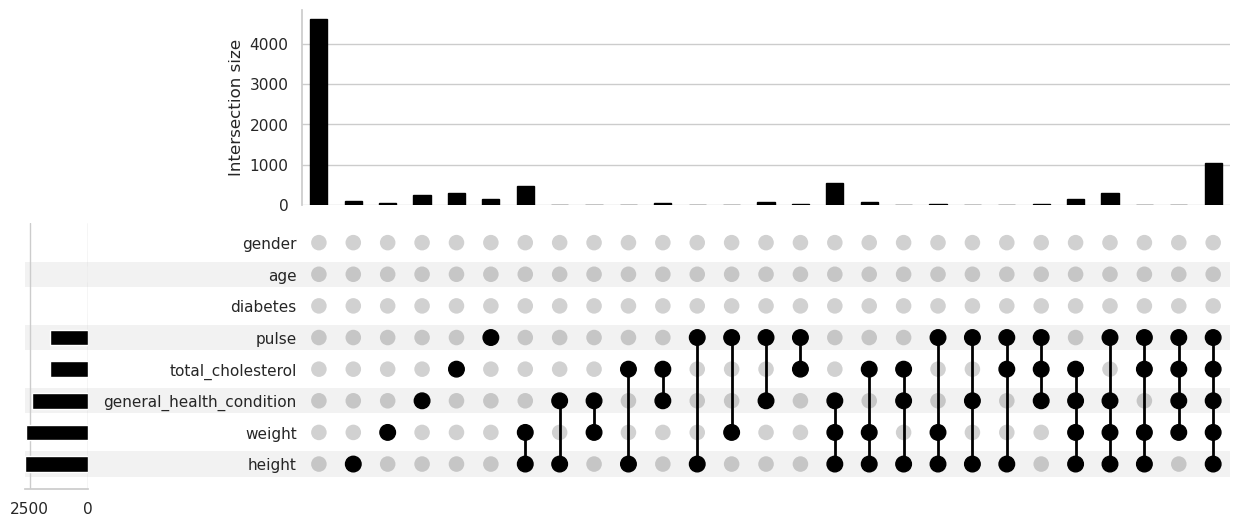

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


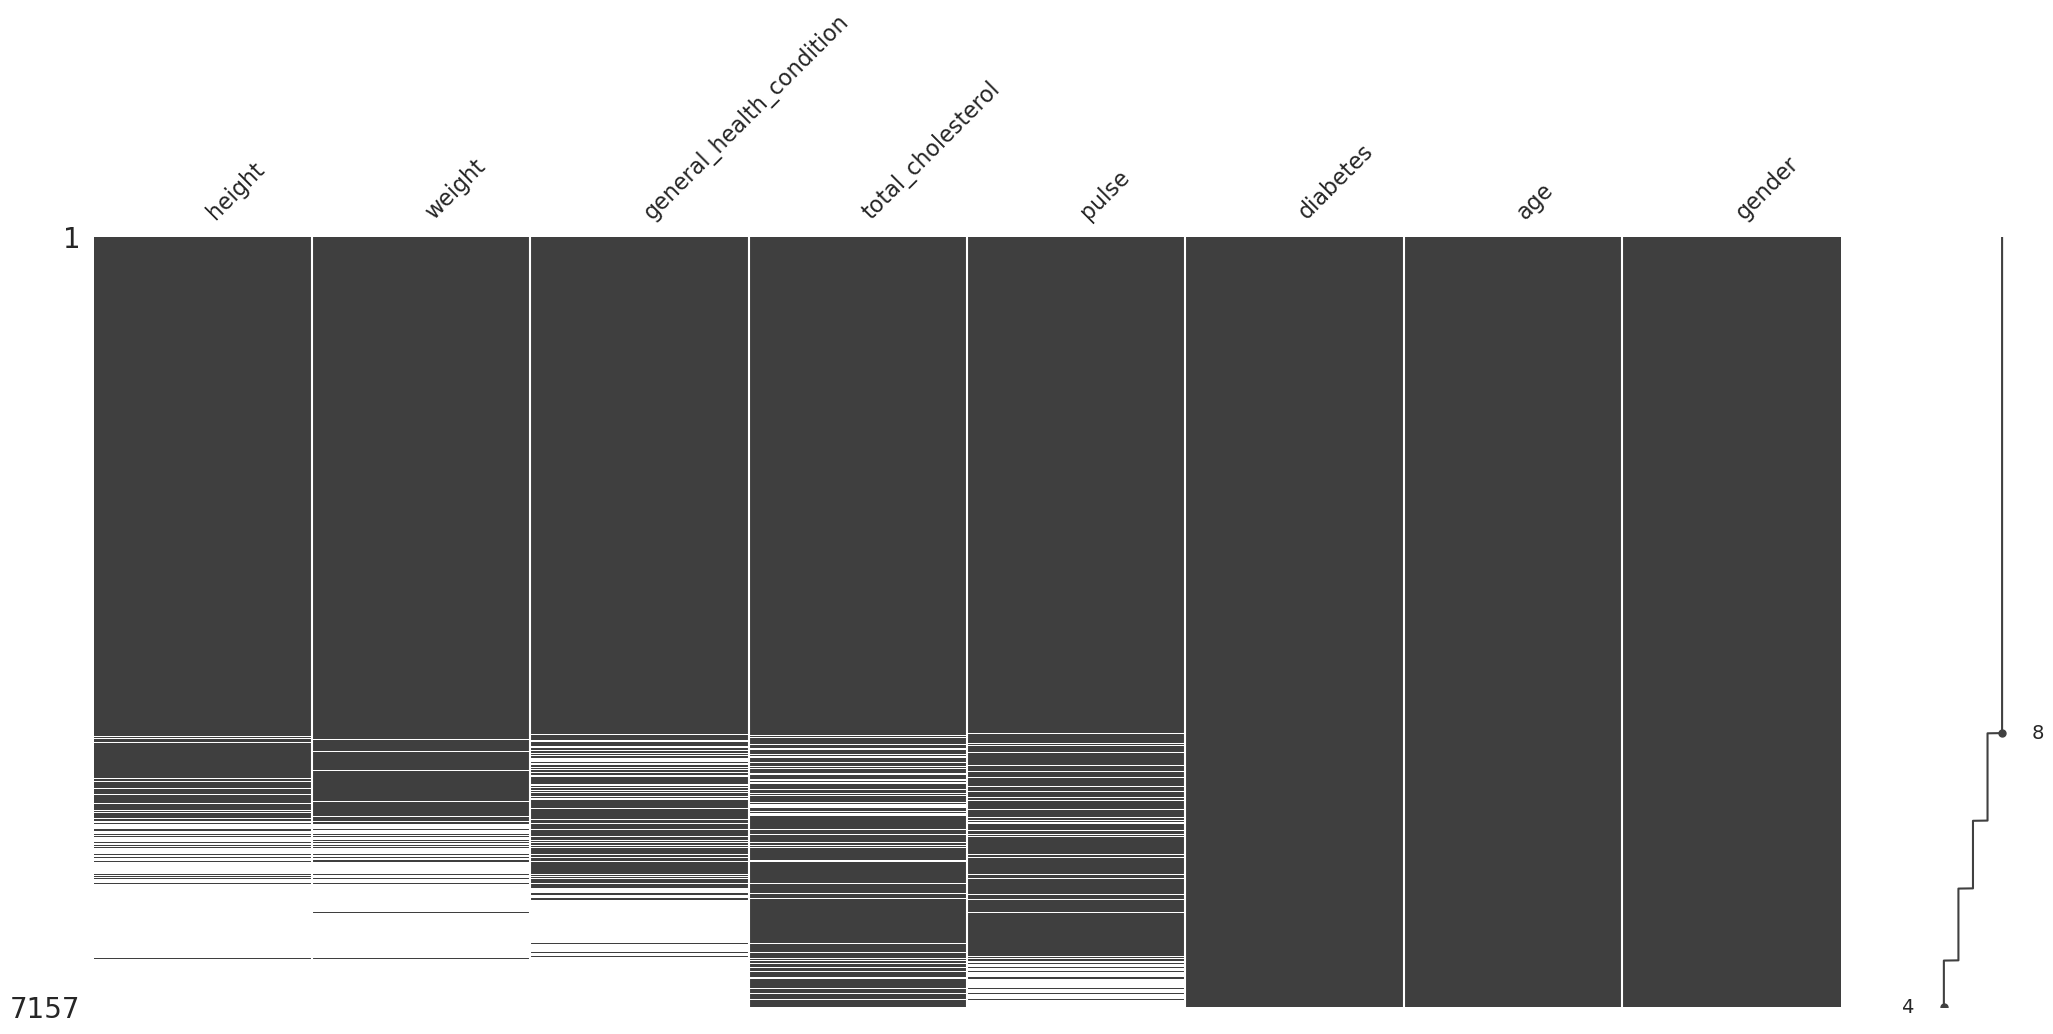

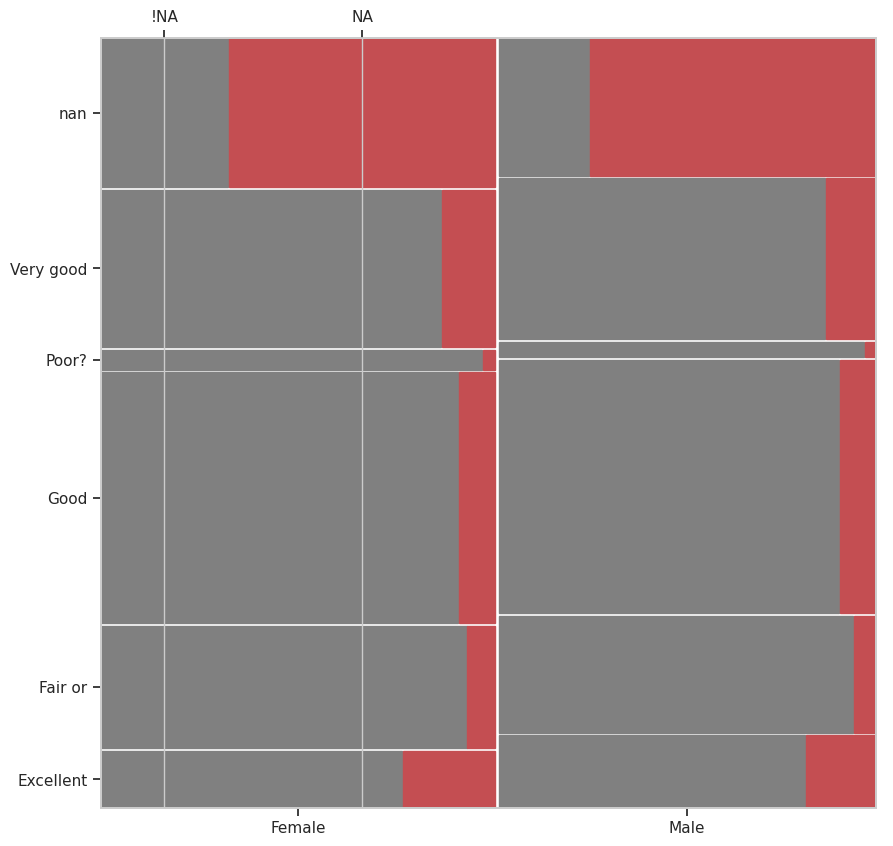

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.r

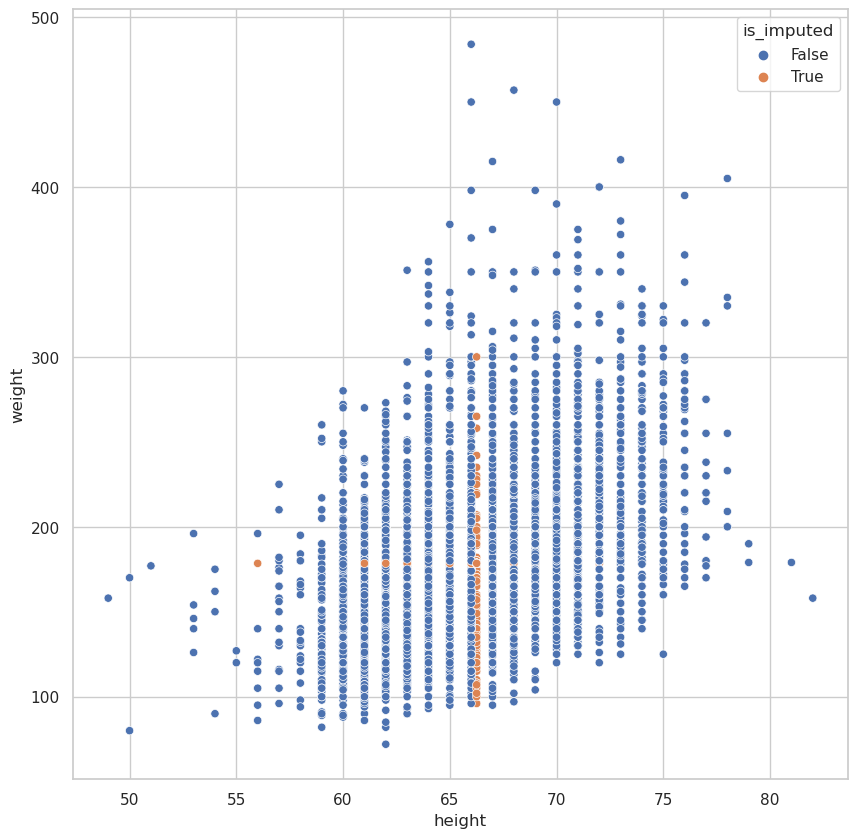

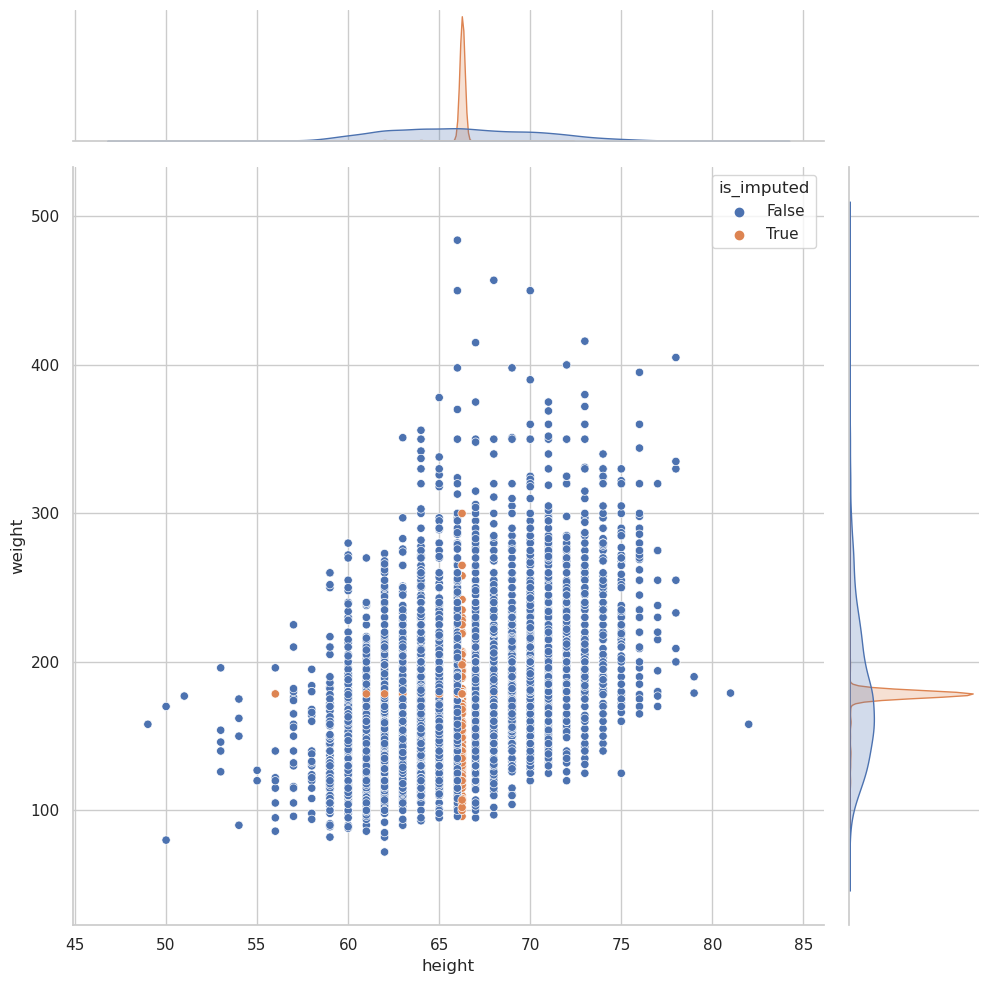

/tmp/ipykernel_62625/1942532761.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  nhanes_df


In [3]:
%run "0.7-antoniolml-imputaciones-lleando-atrás-adelante.ipynb"

## Imputación por interpolación

Interpolacion podria tener diferente formas, por ejemplo por linea recta(interpolacion por modelo) ya que estamos asignando una pendiente y estimando los puntos. 

Tambien podemos utilizar la interpolacion por llenado hacia atras y hacia delante (interpolacion dependiendo del vecino mas cercano) como resultando me da valores de donantes 

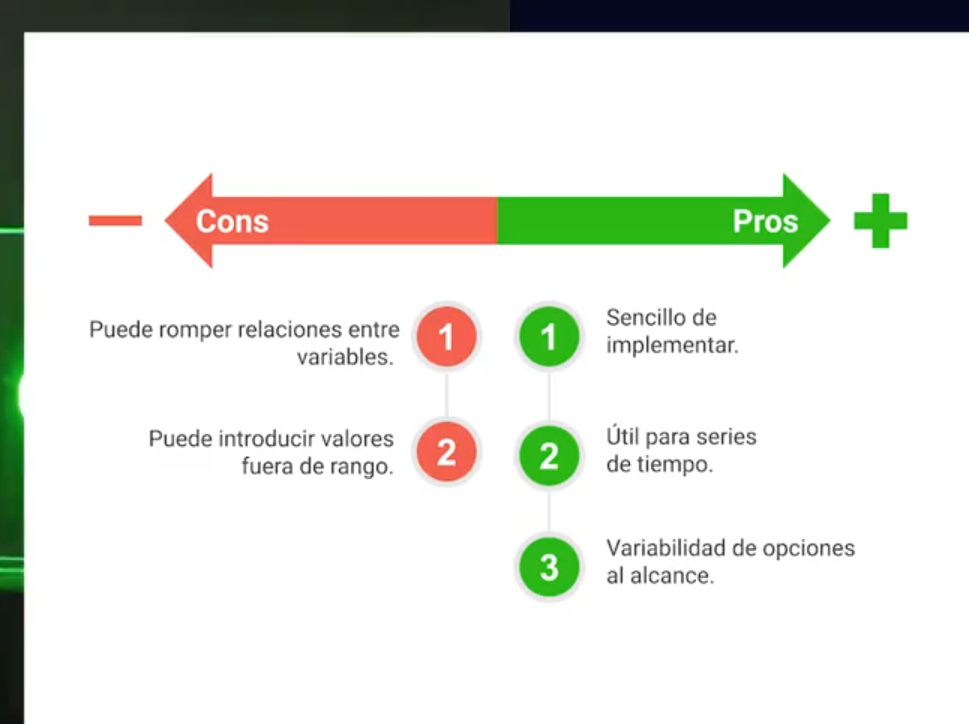

Interpolacion = si tu tienes puntos conocidos,puedes lleganar valores con una estimación respecto a lo conocidom

<AxesSubplot:xlabel='date'>

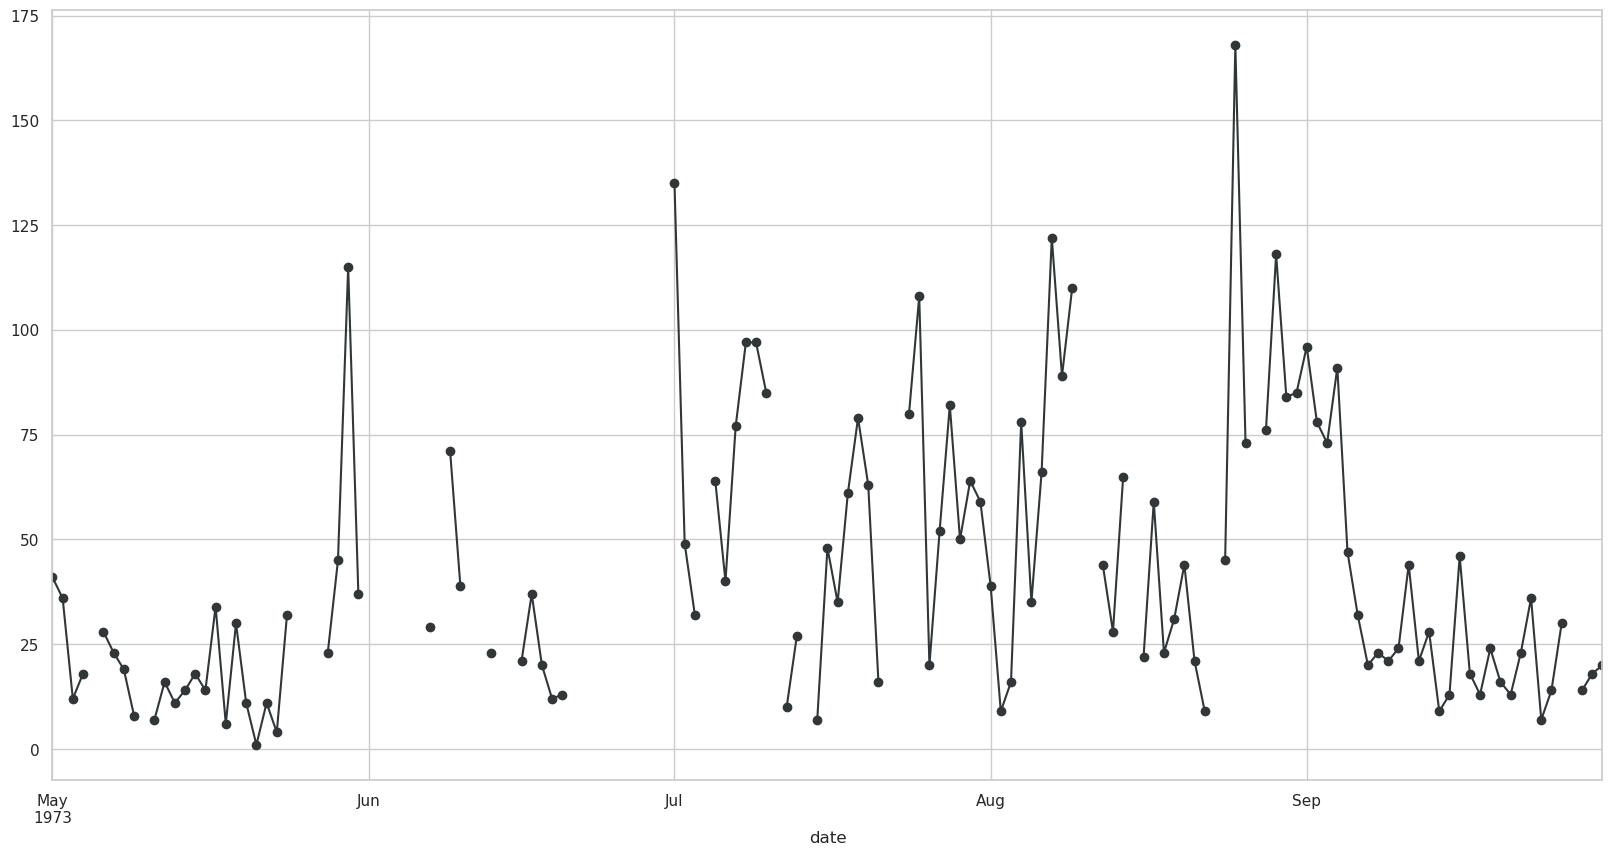

In [4]:
plt.figure(figsize=(20,10))

(
    airquality_df # conjutno de datos que tienen que ver con la calida del aire y la razon es que la dataset contiene datos temporales que es un de los beneficios de este metodo de interpolacion
    .select_columns("ozone") # seleccionamos la columna de ozono
    .pipe(
        lambda df: (
            df.ozone.plot(color = "#313638", marker = "o") # graficamos la columna de ozono
        )
    )
)

# Nuestros puntos estan separados de otras cosas, lo que nos dice que nos faltan datos, nuestra linea negra no es continua 

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

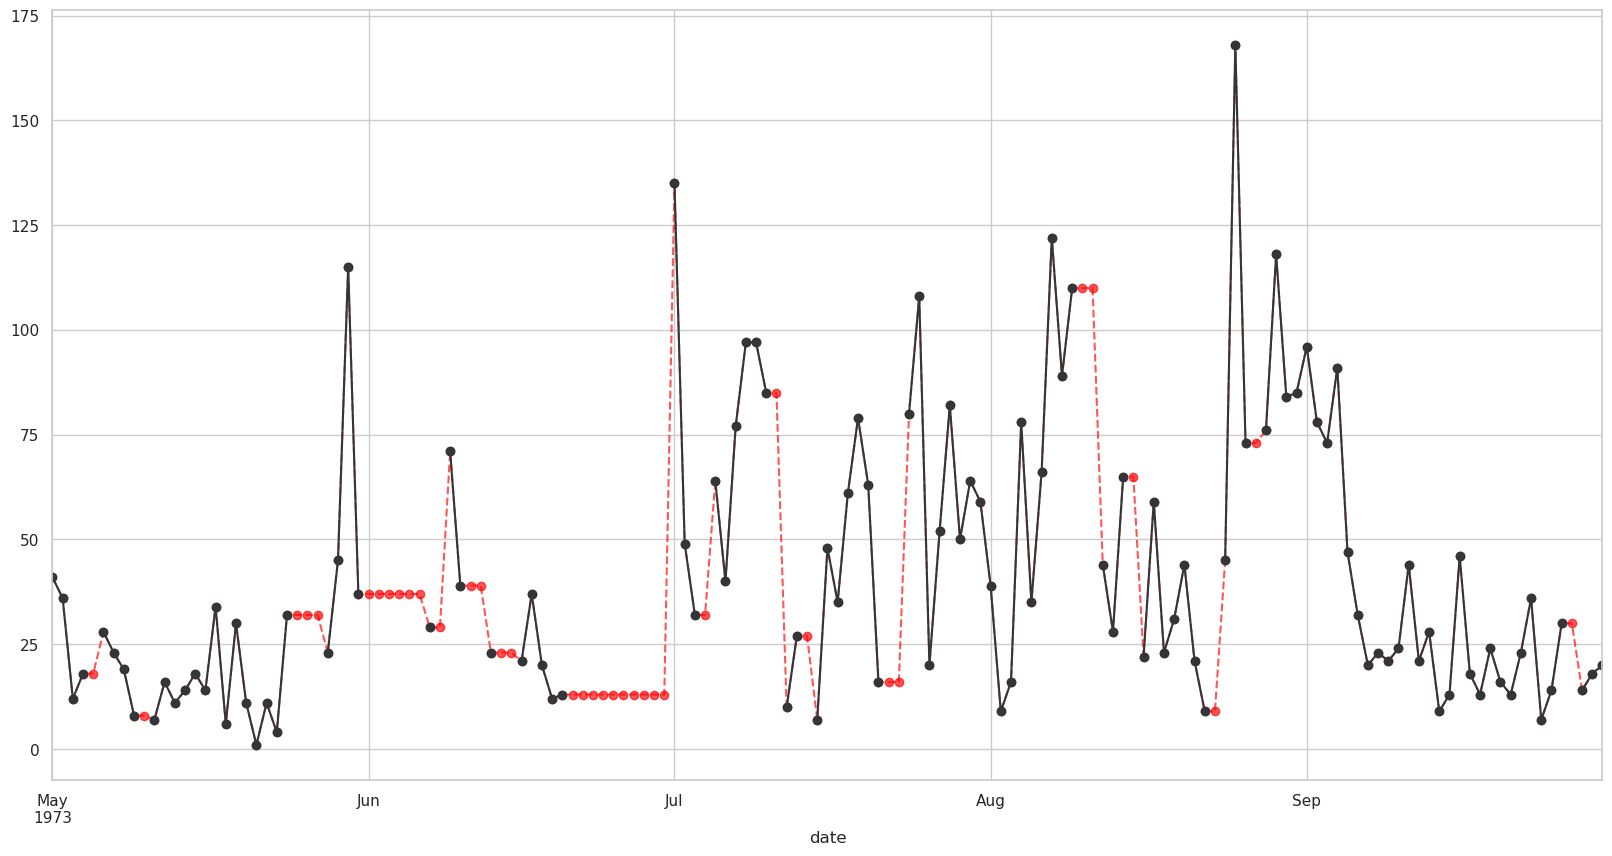

In [5]:
plt.figure(figsize=(20,10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.ffill().plot(color = "red", marker = "o", alpha=6/9, linestyle = "dashed"), # graficamos la columna de ozono con el metodo de interpolacion ffill
            df.ozone.plot(color = "#313638", marker = "o")
        )
    )
)
# ahora nuestra linea roja es continua, lo que nos dice que ya no nos faltan datos

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

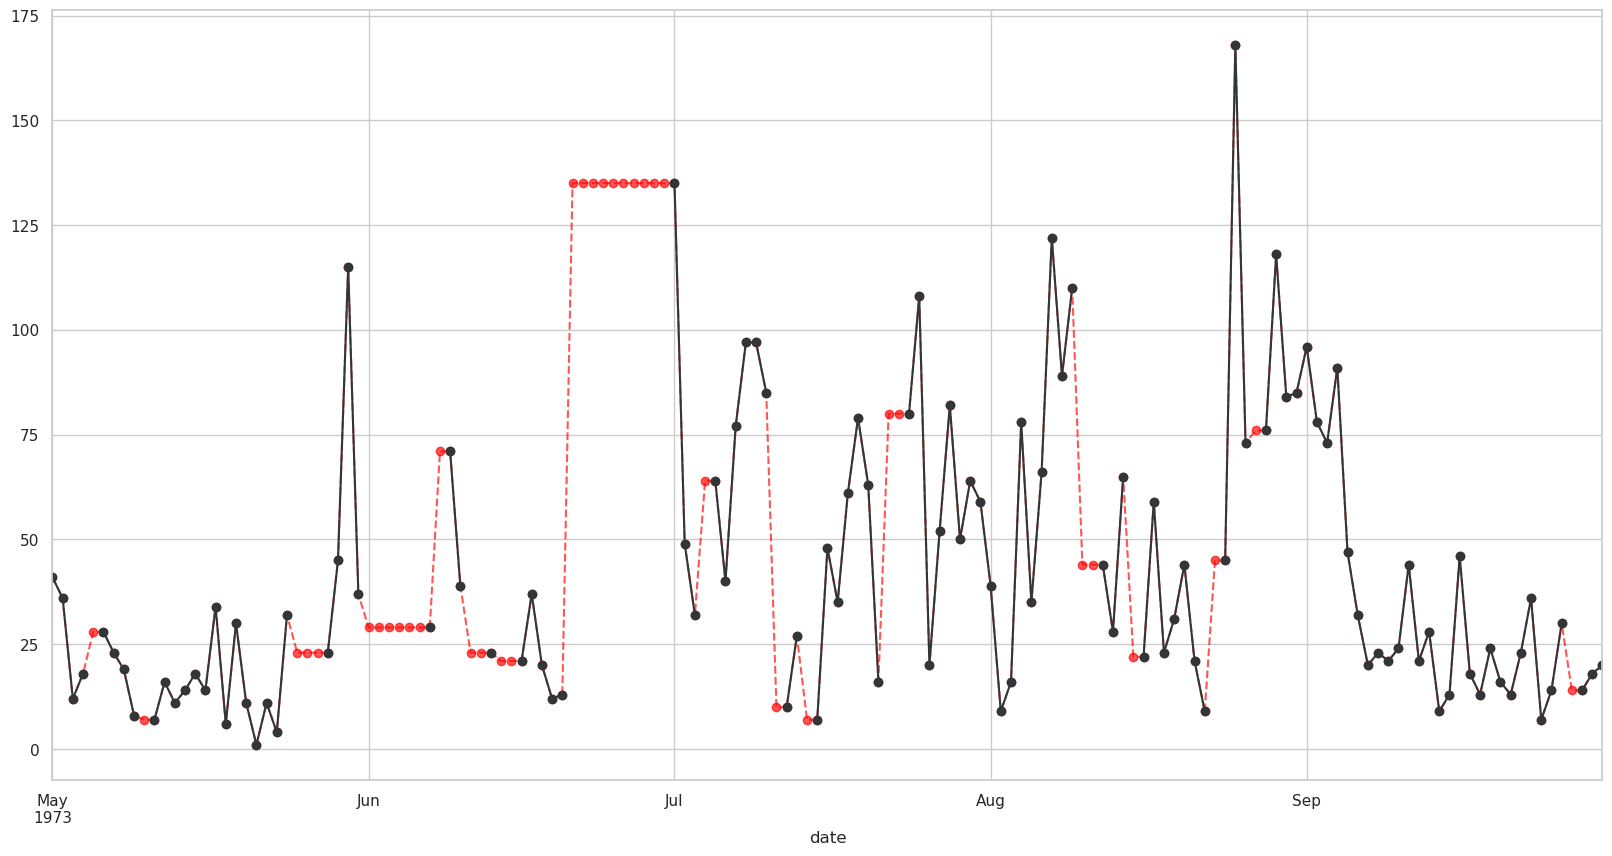

In [6]:
plt.figure(figsize=(20,10)) # ahora usamos bfill para llenar los datos faltantes

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.bfill().plot(color = "red", marker = "o", alpha=6/9, linestyle = "dashed"),
            df.ozone.plot(color = "#313638", marker = "o")
        )
    )
)

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

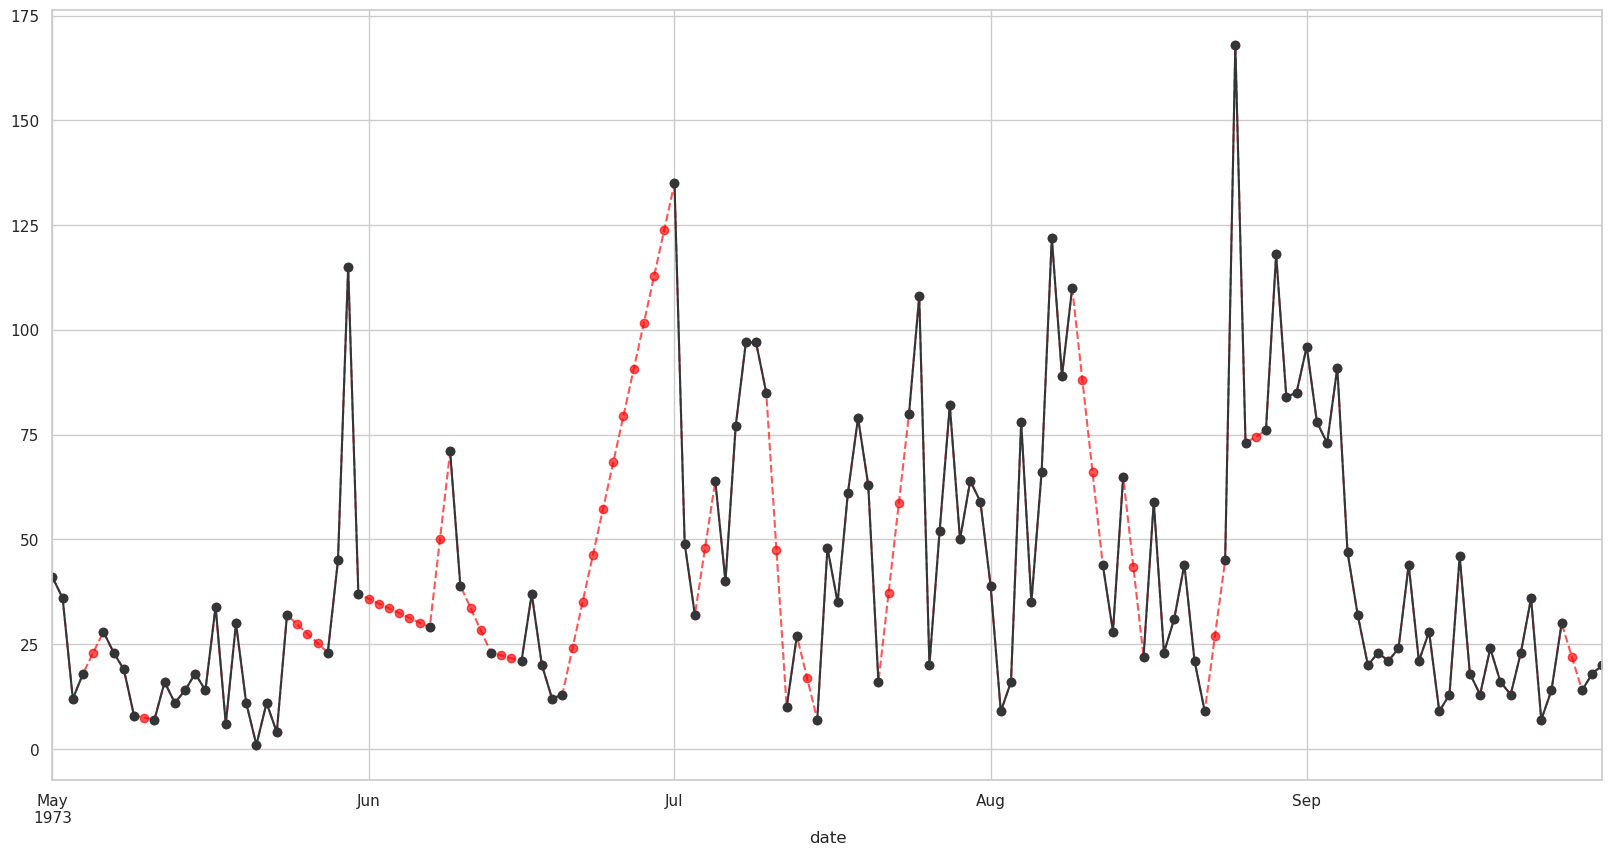

In [7]:
plt.figure(figsize=(20,10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method = "linear").plot(color = "red", marker = "o", alpha=6/9, linestyle = "dashed"), # ahora usamos el metodo interpolate, lo cual nos pide un metodo y en este caso es linear
            df.ozone.plot(color = "#313638", marker = "o")
        )
    )
)
# como resultado nos da una linea recta entre puntos que conocemos para establecer los valores que desconocemos 

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

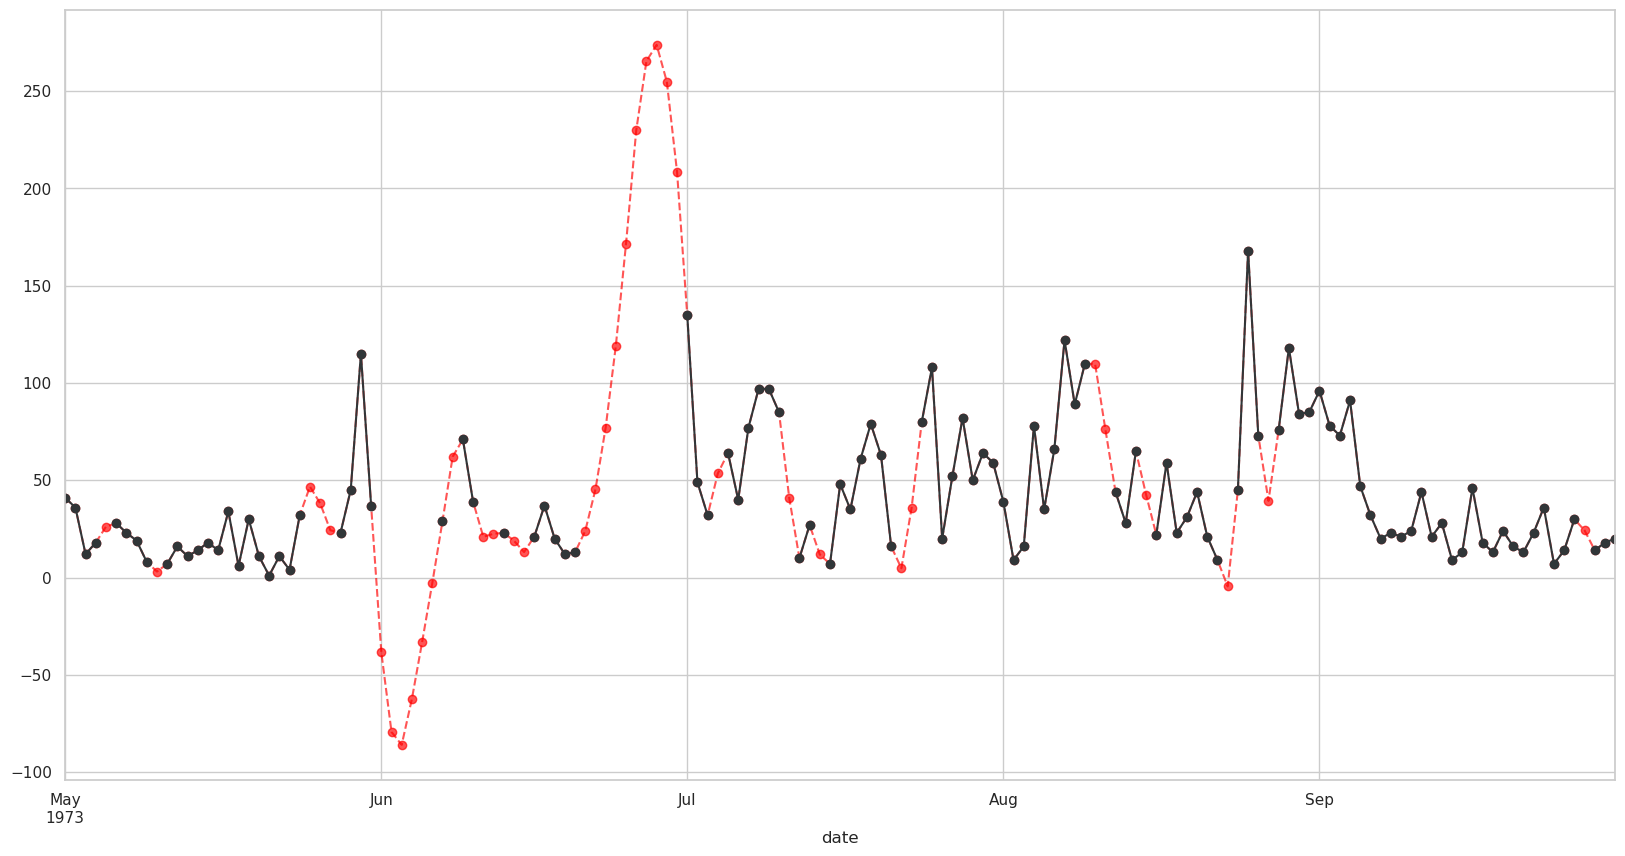

In [8]:
plt.figure(figsize=(20,10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method = "quadratic").plot(color = "red", marker = "o", alpha=6/9, linestyle = "dashed"), #metodo cuadratico
            df.ozone.plot(color = "#313638", marker = "o")
        )
    )
)

# ahora tenemos casos muy altos y casos muy bajos por de bajop de 0(cual podria ser que estan fuera de rango y no tengan sentido)

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

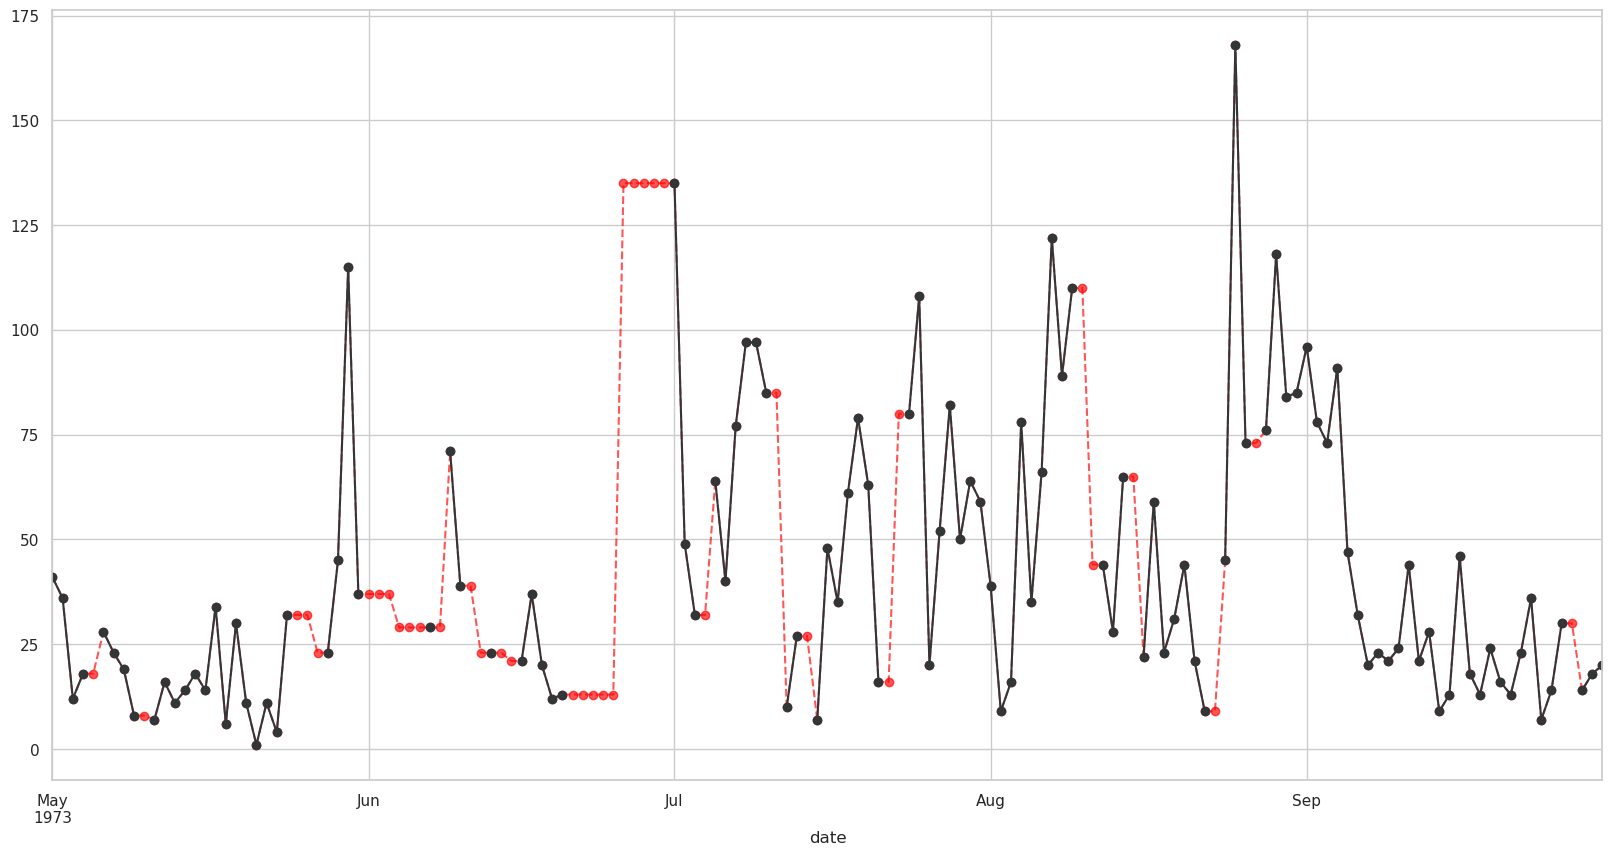

In [9]:
plt.figure(figsize=(20,10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method = "nearest").plot(color = "red", marker = "o", alpha=6/9, linestyle = "dashed"), # metodo nearest el mas cercano
            df.ozone.plot(color = "#313638", marker = "o")
        )
    )
)
# bfill o ffill que realizamos pero dependiendo si el valor es mas cercano a la izquierda o derecha

In [12]:
#Elegir que mejor se ajusta a nuestros datos, en este caso el metodo lineal.
airquality_df["ozone"]=airquality_df.ozone.interpolate(method = "linear")
airquality_df

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,23.0,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,22.0,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973
